https://www.kaggle.com/tmdb/tmdb-movie-metadata/data

The dataset was pulled from Kaggle.com (an open source data science website). The user who uploaded the data, scraped content from IMDB's website. The user chose to store the movie title, budget, earnings, genre list, average rating, and the popularity score (calculated by the movie page views). This data is interesting because it looks at a large number of movies and includes data that reports on relative financial success, movie rating, and movie popularity. A movie producer could show potential investors how a new movie idea would correlate to existing successful movies while estimating basic trends for financial success, ratings, and popularity.

Questions to explore: Is there a correlation between budget and revenue? Is there a normal distribution of revenue per genre? Is there a relationship between gross profits and genre type? 

In [308]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar
from matplotlib.pyplot import subplots, show
import ast
%matplotlib inline

pd.set_option('show_dimensions', False)
# pd.set_option('display.html.border', 3)

In [309]:
# import data, add gross revenue column, and delete homepage/overview columns
moviedata = pd.read_csv('tmdb_5000_movies.csv', encoding = "ISO-8859-1") 
moviedata['gross'] = moviedata['revenue'] - moviedata['budget']
del moviedata['homepage']
del moviedata['overview']
del moviedata['original_title']

In [310]:
# function for returning list of unique values in column
def find_set(series, unique=[]):
    for fulllist in series:
        fulllist = ast.literal_eval(fulllist)
        for fulldict in fulllist:
            if 'name' in fulldict:
                unique.append(fulldict['name'])          
    return set(unique)

# function for converting dictionaries to simple lists in columns
def name_fix(fulllist):
    try:
        glist=[]
        fulllist = ast.literal_eval(fulllist)
        for fulldict in fulllist:
            if 'name' in fulldict:
                glist.append(fulldict['name'])
        return ', '.join(glist)
    except (SyntaxError, ValueError, TypeError) as e:
        return fulllist

In [311]:
# creates list of unique values for specific columns
un_genre = list(find_set(moviedata.genres))
un_country = list(find_set(moviedata.production_countries))
un_language = list(find_set(moviedata.spoken_languages))
un_keywords = list(find_set(moviedata.keywords))

# prints out the number of unique values
print("COUNTRIES: {}, GENRES: {}, LANGUAGES: {}".format(len(un_country),len(un_genre),len(un_language)))

COUNTRIES: 108, GENRES: 20, LANGUAGES: 170


In [312]:
# runs the name fix function to make the dataset easier to read
for column in moviedata:
    moviedata[column] = moviedata[column].apply(name_fix)   

In [313]:
# reporting of data
print("BUDGET MAX: ${:,.2f} REVENUE MAX: ${:,.2f} GROSSING MAX: ${:,.2f}".format(moviedata['budget'].max(),moviedata['revenue'].max(),moviedata['gross'].max()))    
print("BUDGET MEAN: ${:,.2f} REVENUE MEAN: ${:,.2f} GROSSING MEAN: ${:,.2f}".format(moviedata['budget'].mean(),moviedata['revenue'].mean(),moviedata['gross'].mean()))          
moviedata.head()

BUDGET MAX: $380,000,000.00 REVENUE MAX: $2,787,965,087.00 GROSSING MAX: $2,550,965,087.00
BUDGET MEAN: $29,045,039.88 REVENUE MEAN: $82,260,638.65 GROSSING MEAN: $53,215,598.78


,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,gross
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",1987,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087
1,300000000,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",1979,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,635674609
3,250000000,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,834939099
4,260000000,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,24139100


There are ~4800 movies, 20 genre types, 108 countries, and ~170 languages.

The highest budget movie is 380,000,000.00 dollars. Highest revenue is 2,787,965,087.00 dollars. The highest grossing was 2,550,965,087.00 (Avatar).

The average budget was 29,045,039.88 dollars. The average revenue was 82,260,638.65 dollars and the average gross was 53,215,598.78 dollars.

In [314]:
# function for checking if genre exists in a column
def genre_check(value):
    for member in un_genre:
        if member in value:
            return True
        else:
            return False

In [315]:
# creates temp columns for True/False check of each genre and deletes main genre column
for column in un_genre:
    moviedata[column] = moviedata.genres.apply(lambda value: column in value)    
del moviedata['genres']

In [316]:
# creates new dataframes for each genre and puts into genredict
genredict = {}
gross_profits = pd.DataFrame()

for column in un_genre:
    df = moviedata[moviedata[column] == True]
    genredict[column] = df.drop(un_genre, axis=1, inplace=False)    

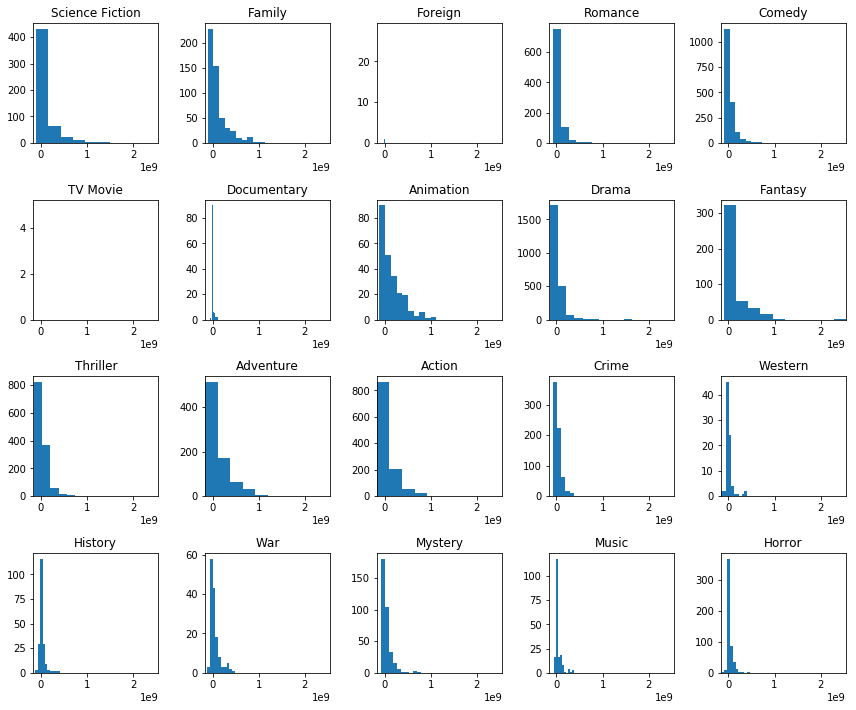

In [317]:
# hist plot of diff genres gross profits
i = 1
fig=plt.figure(figsize=(12,12))

xmin = moviedata['gross'].min()
xmax = moviedata['gross'].max()
for genre in genredict:
    plt.subplot(5, 5, i)
    
    i = i + 1
    plt.hist(genredict[genre]['gross'],bins=10)
    plt.xlim(xmin,xmax)
    plt.title(genre)
    
plt.tight_layout()
plt.show()

/Users/ryan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


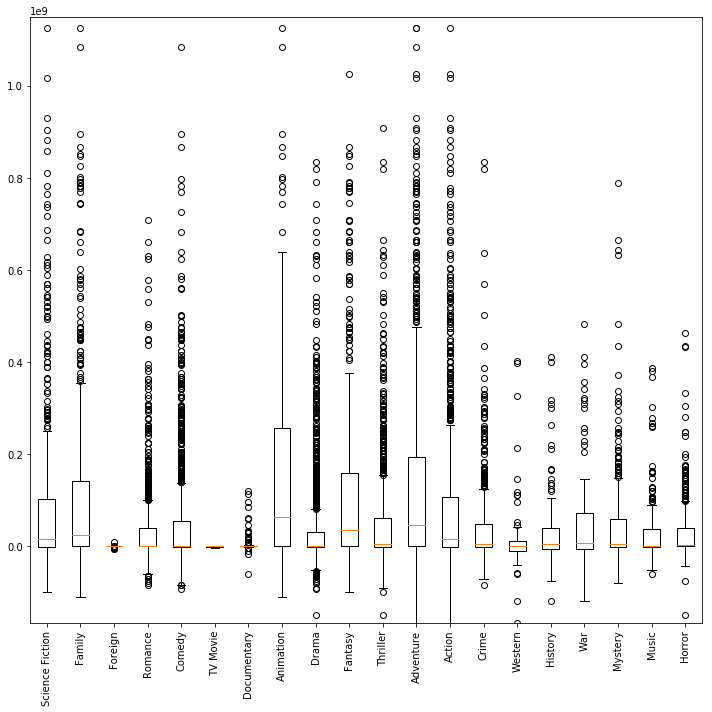

In [318]:
def ser_con(genre): return genredict[genre]['gross']

plt.figure(figsize=(10,10))
plt.boxplot(list(map(ser_con, un_genre)))
plt.xticks(list(range(1,21)), un_genre, rotation=90)
plt.ylim(moviedata['gross'].min(), moviedata['gross'].max()*.45)
plt.tight_layout()
plt.show()

Foreign and TV movie genres don't appear to have much variance, which is to be expected considering that there probably wouldn't be much reported revenue from movie theaters in the US. Animation films appear to have the best gross profit range (maybe cost of production is lower?). Romance, Horror, and Music films seem to trend towards a positive gross profit albeit their upper quartile ranges are smaller than other high grossing genres. The lower quartile range of Action and Adventures films seem to run in negative gross profits.

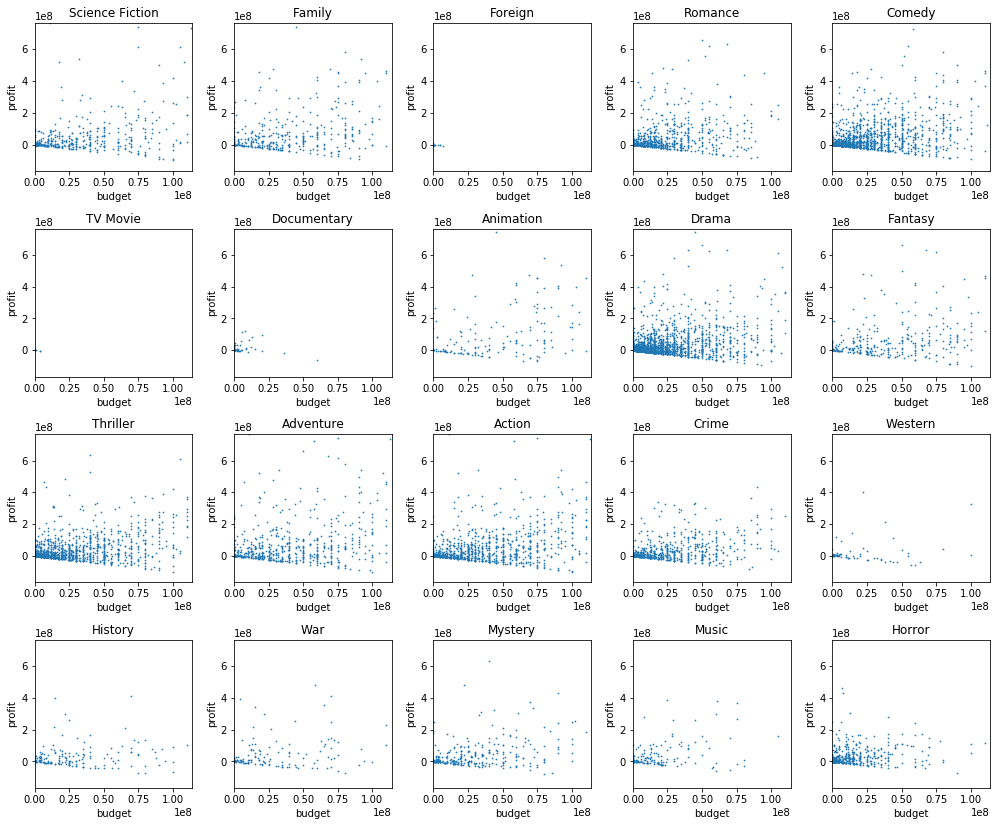

In [340]:
# plot of expense(x) to revenue(y)
correlation = {}
i = 1
fig=plt.figure(figsize=(14,14))

xmin = moviedata['budget'].min()
xmax = moviedata['budget'].max()*.3

ymin = moviedata['gross'].min()
ymax = moviedata['gross'].max()*.3

for genre in genredict:
    plt.subplot(5, 5, i)
    i = i + 1
    plt.scatter(genredict[genre]['budget'],genredict[genre]['gross'],.5)
    
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.title(genre)
    plt.xlabel('budget')
    plt.ylabel('profit')
    
    correlation[genre] = (genredict[genre]['budget'].corr(genredict[genre]['gross']))
    
plt.tight_layout()
plt.show()

In [337]:
print('--CORRELATION BETWEEN EXPENSE AND PROFIT--')
for key in correlation:
    print("{}: {}".format(key, correlation[key]))

--CORRELATION BETWEEN EXPENSE AND PROFIT--
Science Fiction: 0.5869991329566364
Family: 0.5564977453231562
Foreign: -0.6807663647926859
Romance: 0.4364316327475838
Comedy: 0.5064179319094227
TV Movie: -1.0
Documentary: 0.006147059539220788
Animation: 0.5227096890624338
Drama: 0.45802522058523343
Fantasy: 0.5919416715721276
Thriller: 0.5528890538166866
Adventure: 0.5697632541939066
Action: 0.6135578735709715
Crime: 0.5734102651868525
Western: 0.07376500161112028
History: 0.20388005934093092
War: 0.27337282652163836
Mystery: 0.4885524462987987
Music: 0.41796510667726766
Horror: 0.30977866084620803


In [ ]:
# creates a new dataframe based on genres
dfSeries = {}
intcolumns = ['budget','popularity','revenue','runtime','vote_average','gross']
for col in intcolumns:
    poplist = []
    for genre in un_genre:
        poplist.append(moviedata[genre] == True)

    serlist = []
    for ser in poplist:
        serlist.append(moviedata.loc[ser, col].mean())
        
    dfSeries[col] = serlist
    
dfGenre = pd.DataFrame(dfSeries)
dfGenre.index = un_genre

dfGenre